In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 


### 1. load data

In [2]:
data = pd.read_csv('bike_data.csv', header=0)
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,breakdown,cumTime,cumDist,cumRide,cumBreak,intensity,meanDist,age,summer
0,1,14910,1398094,458,1,93,3052,54,0
1,1,1281,189910,78,1,148,2434,62,0
2,1,8324,769168,332,3,92,2316,57,1
3,1,31610,2988819,949,1,94,3149,105,1
4,1,5587,518114,176,1,92,2943,41,1


### 2. feature selection

In [5]:
#독립변수 % 종속변수 정의
X = data.drop('breakdown', axis=1, inplace=False)
y = data['breakdown']

### 3. implementing the statistic model

In [6]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.627495
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              breakdown   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39992
Method:                           MLE   Df Model:                            7
Date:                Sat, 12 Mar 2022   Pseudo R-squ.:                 0.09472
Time:                        01:31:06   Log-Likelihood:                -25100.
converged:                       True   LL-Null:                       -27726.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cumTime     1.148e-05   5.94e-06      1.935      0.053    -1.5e-07    2.31e-05
cumDist     2.343e-07   4.01e-08      5.841      0.000    1.56e-07    3.13e-07
cumRide       -0.0018      0.000     -9.008      0.000      -0.002      -0.001
cumBreak       0.3645      0.006     60.202      0.000       0.353       0.376
intensity      0.0033      0.001      4.740      0.000       0.002       0.005
meanDist      -0.0002   2.48e-05     -7.730      0.000      -0.000      -0.000
age        -3.554e-06      0.000     -0.021      0.983      -0.000       0.000
summer        -0.1261      0.027     -4.728      0.000      -0.178      -0.074
==============================================================================
"""

The p-values for most of the variables are very small, therefore, most of them are significant to the model. <br>
모든 변수의 p-value가 충분히 작으므로 모두 유효함

### 4. Logistic Regression model fitting

In [8]:
#데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#데이터 학습
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Train set 정확도: %2f' % logreg.score(X_train, y_train))
print('Test set 정확도: %2f' % logreg.score(X_test, y_test))

Train set 정확도: 0.551929
Test set 정확도: 0.559333


### 5. k-fold cross validation

In [13]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.536


### 6. confusion matrix

In [19]:
y_pred = logreg.predict(X_test)

In [23]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3018 2984]
 [2304 3694]]


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53      6002
           1       0.55      0.62      0.58      5998

    accuracy                           0.56     12000
   macro avg       0.56      0.56      0.56     12000
weighted avg       0.56      0.56      0.56     12000



precision(정밀도) : 양성이라 예측한 값 중 실제 양성인 개수 <br>
recall(재현율) : 실제 양성인 값 중 양성이라 예측한 개수<br>
accuracy(정확도) : 전체 중 제대로 예측한 샘플의 개수<br>
f1-score : precision과 recall의 가중 조화평균<br>
support : 각 라벨의 실제 샘플 개수<br>
macro avg : 단순 평균 (각 클래스의 샘플 개수의 불균형 고려 X)<br>
weighted avg : 가중 평균 (각 클래스의 샘플 개수의 불균형 고려 O)

### 7. ROC curve

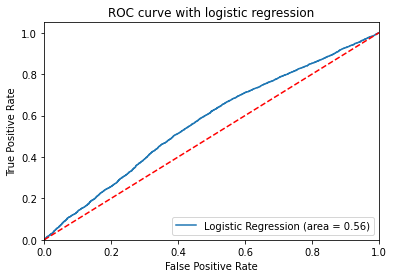

In [30]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve with logistic regression')
plt.legend(loc="lower right")
plt.savefig('ml_Log_ROC')
plt.show()